# Dataset Visualisation
* Romain Capocasale
* IADeforestation
* HES-SO MASTER

# Import

In [10]:
import rasterio
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

from IAdeforestation.tools import *

# Image coordinates verification
The goal is to verify that the algorithm that cuts the images assigns the right geographic coordinates to the right portion of the image. 

![notebook_images/CoordCheck.PNG](notebook_images/CoordCheck.PNG)

An easily identifiable image was used. It is the beach with a clear separation between water and sand. On top of the image you can see the two geographic points generated (top left and bottom right).

![notebook_images/CoordCheckGMaps.PNG](notebook_images/CoordCheckGMaps.PNG)

By inserting the 2 coordinates in google maps we can see that the bounding box formed by the two points (red arrow on google maps) corresponds well to the image cut by the algorithm.

# Image visualisation by class

## Coffee vs other

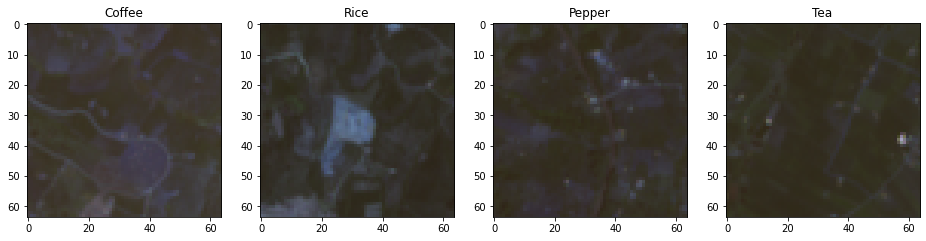

In [21]:
paths = [("Coffee", os.path.join("spring_images","2", "0_3_57.tiff")), 
         ("Rice", os.path.join("spring_images","18", "0_25_81.tiff")),
         ("Pepper", os.path.join("spring_images","15","2_66_77.tiff")),
        ("Tea", os.path.join("spring_images","17","0_22_8.tiff"))]

fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,4))
axes = axes.flatten()

i = 0

for name, path in paths:
    img = rasterio.open(path).read()
    norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    norm_image = np.moveaxis(norm_image, 0,-1)
    
    axes[i].imshow(norm_image[:,:,1:4])
    axes[i].set_title(name)
    i+=1

## Culture vs no culture

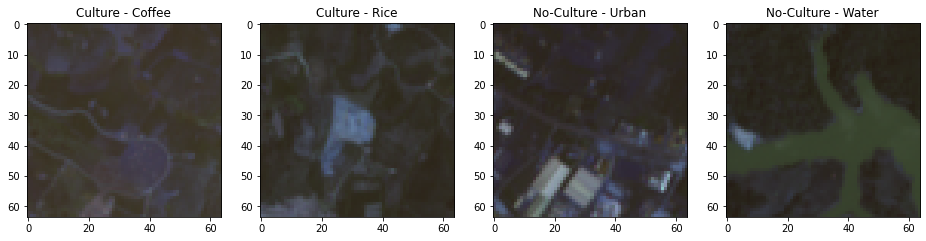

In [7]:
paths = [("Culture - Coffee", os.path.join("spring_images","2", "0_3_57.tiff")), 
         ("Culture - Rice", os.path.join("spring_images","18", "0_25_81.tiff")),
         ("No-Culture - Urban", os.path.join("spring_images","9", "2_55_72.tiff")),
         ("No-Culture - Water", os.path.join("spring_images","10", "1_93_141.tiff"))]
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,4))
axes = axes.flatten()

i = 0

for name, path in paths:
    img = rasterio.open(path).read()
    norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    norm_image = np.moveaxis(norm_image, 0,-1)
    
    axes[i].imshow(norm_image[:,:,1:4])
    axes[i].set_title(name)
    i+=1

# Image labeling verification
The goal is to verify that the images have been properly labeled and displaying image classes that are easily recognizable like :
* Coffee
* Urban
* Rice
* Water

## Coffee

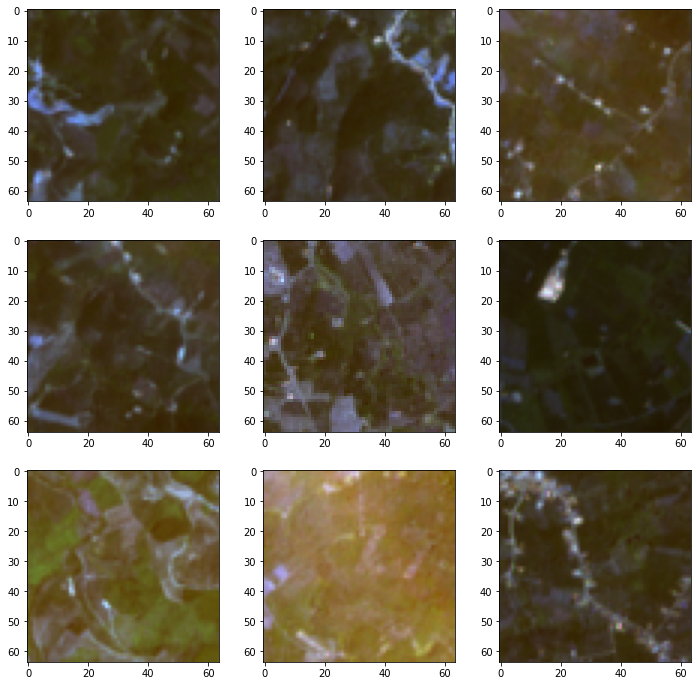

In [18]:
WATERPATH = 'spring_images/2/'
water_paths = [os.path.join(WATERPATH, s) for s in os.listdir(WATERPATH)]
show_grid_img(water_paths[10:19])

## Urban

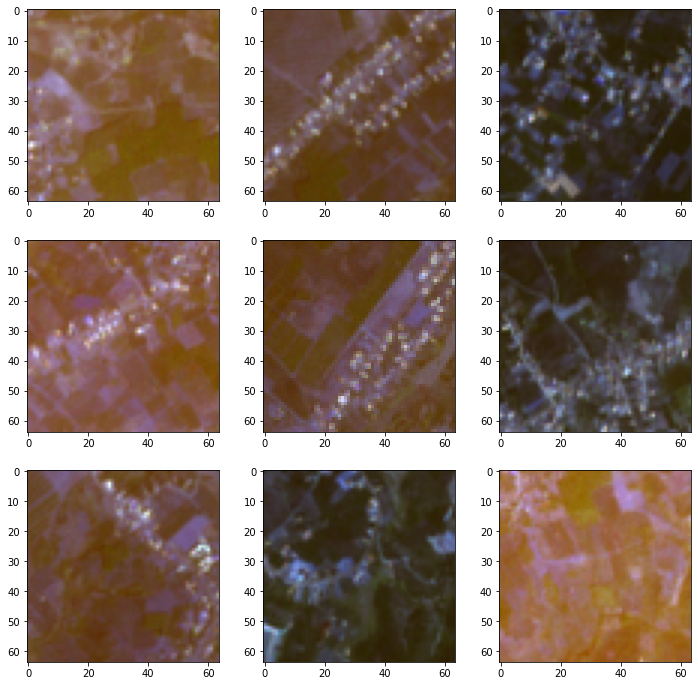

In [17]:
WATERPATH = 'spring_images/9/'
water_paths = [os.path.join(WATERPATH, s) for s in os.listdir(WATERPATH)]
show_grid_img(water_paths[10:19])

## Rice

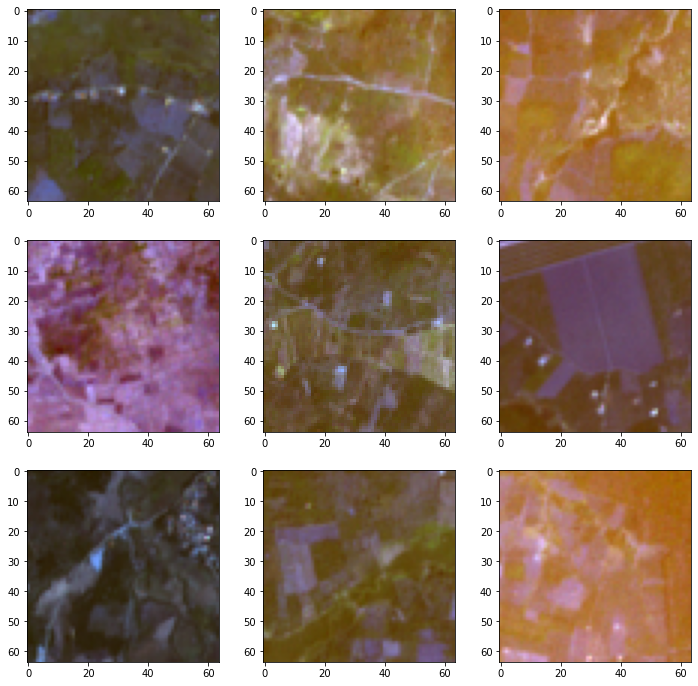

In [20]:
WATERPATH = 'spring_images/18/'
water_paths = [os.path.join(WATERPATH, s) for s in os.listdir(WATERPATH)]
show_grid_img(water_paths)

## Water

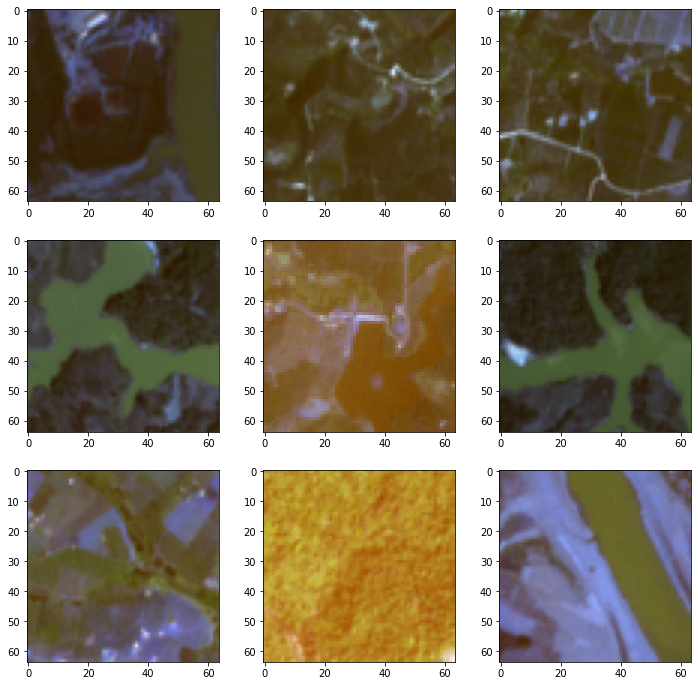

In [16]:
WATERPATH = 'spring_images/10/'
water_paths = [os.path.join(WATERPATH, s) for s in os.listdir(WATERPATH)]
show_grid_img(water_paths[1:10])